In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

df = pd.read_csv("label_tweets_v2.csv");

#change columns name
df = df.rename(columns={"Unnamed: 0":"index"})



In [2]:
# remvoe null value
df=df.dropna()

#check the null value
df.isnull().sum()

index       0
score       0
label       0
text        0
date        0
username    0
hashtags    0
dtype: int64

In [3]:
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH
5,5,-0.5719,0.0,metrics to help human resources measure employ...,4/29/2020 23:59,MeetingInfoHQ,#WFH #remotemeetings


### Understanding the common words used in the tweets: WordCloud

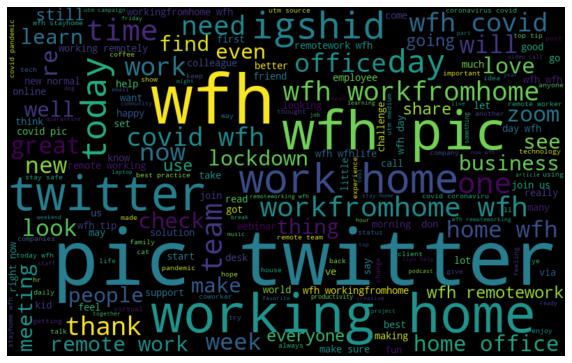

In [4]:
all_words = ' '.join([text for text in df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

bag of word

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['text'])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# splitting data into training and validation set
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()

lreg.fit(xtrain_bow, ytrain) # training the model


predicted= lreg.predict(xtest_bow)# predicting on the validation set

# print("Train accuracy:", lreg.score(ytest,prediction))




In [22]:
from sklearn.metrics import classification_report, accuracy_score
print("MultinomialNB Accuracy:",metrics.accuracy_score(ytest, predicted))

MultinomialNB Accuracy: 0.8689041038350065


In [25]:
y_pred = lreg.predict(xtest_bow)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.44      0.55      4343
         1.0       0.89      0.96      0.92     19464

    accuracy                           0.87     23807
   macro avg       0.81      0.70      0.74     23807
weighted avg       0.86      0.87      0.86     23807



In [28]:
from sklearn import tree


clf = tree.DecisionTreeClassifier()

clf.fit(xtrain_bow, ytrain)


predicted= clf.predict(xtest_bow)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
print("MultinomialNB Accuracy:",metrics.accuracy_score(ytest, predicted))

MultinomialNB Accuracy: 0.8038392069559374


In [31]:
y_pred = clf.predict(xtest_bow)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.54      0.50      4343
         1.0       0.89      0.86      0.88     19464

    accuracy                           0.80     23807
   macro avg       0.68      0.70      0.69     23807
weighted avg       0.82      0.80      0.81     23807

